<a href="https://colab.research.google.com/github/palash04/Artificial-Intelligence/blob/master/Neural_Networks/Intro_to_Pytorch/_04_F_MNIST_with_dropout_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Screenshot 2020-07-02 at 08 24 46](https://user-images.githubusercontent.com/26361028/86311216-80506200-bc3d-11ea-92a9-60c0f05a44b8.png)


In [1]:
import numpy as np
import torch
from torch import nn,optim
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

In [3]:
# Downloading dataset
# Shuffle them and transform each one of them

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data',download=True,train=True,transform=transform)
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data',download=True,train=False,transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [4]:
import torch.nn.functional as F

In [11]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.fc1 = nn.Linear(784,256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,10)

    # Dropout module with probability
    self.dropout = nn.Dropout(p=0.2)

  def forward(self,x):
    x = x.view(x.shape[0],-1)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))

    # for output no dropout
    x = F.log_softmax(self.fc4(x),dim=1)
    return x

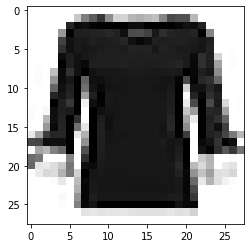

In [7]:
images,labels = next(iter(trainloader))
plt.imshow(images[0].numpy().squeeze(),cmap='gray_r')

In [13]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30

train_losses,test_losses = [],[]

for e in range(epochs):
  running_loss = 0
  for images,labels in trainloader:
    optimizer.zero_grad()
    logps = model(images)
    loss = criterion(logps,labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

  else:
    test_loss = 0
    accuracy = 0
    # Turn off gradients
    with torch.no_grad():
      model.eval()
      for images,labels in testloader:
        logps = model(images)
        loss = criterion(logps,labels)
        test_loss += loss.item()
        ps = torch.exp(logps)

        top_p,top_class = ps.topk(1,dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))

    model.train()

    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))

    print ('Epoch {}/{}..'.format(e+1,epochs),
           'Training Loss: {:.3f}'.format(running_loss/len(trainloader)),
           'Test Loss: {:.3f}'.format(test_loss/len(testloader)),
           'Test Accuracy: {:.3f}'.format(accuracy/len(testloader)))

    

Epoch 1/30.. Training Loss: 0.603 Test Loss: 0.480 Test Accuracy: 0.829
Epoch 2/30.. Training Loss: 0.484 Test Loss: 0.434 Test Accuracy: 0.848
Epoch 3/30.. Training Loss: 0.450 Test Loss: 0.428 Test Accuracy: 0.845
Epoch 4/30.. Training Loss: 0.429 Test Loss: 0.423 Test Accuracy: 0.851
Epoch 5/30.. Training Loss: 0.418 Test Loss: 0.390 Test Accuracy: 0.859
Epoch 6/30.. Training Loss: 0.415 Test Loss: 0.406 Test Accuracy: 0.855
Epoch 7/30.. Training Loss: 0.405 Test Loss: 0.400 Test Accuracy: 0.862
Epoch 8/30.. Training Loss: 0.397 Test Loss: 0.400 Test Accuracy: 0.856
Epoch 9/30.. Training Loss: 0.391 Test Loss: 0.385 Test Accuracy: 0.864
Epoch 10/30.. Training Loss: 0.387 Test Loss: 0.383 Test Accuracy: 0.866
Epoch 11/30.. Training Loss: 0.382 Test Loss: 0.381 Test Accuracy: 0.865
Epoch 12/30.. Training Loss: 0.380 Test Loss: 0.380 Test Accuracy: 0.872
Epoch 13/30.. Training Loss: 0.375 Test Loss: 0.375 Test Accuracy: 0.869
Epoch 14/30.. Training Loss: 0.371 Test Loss: 0.379 Test Acc

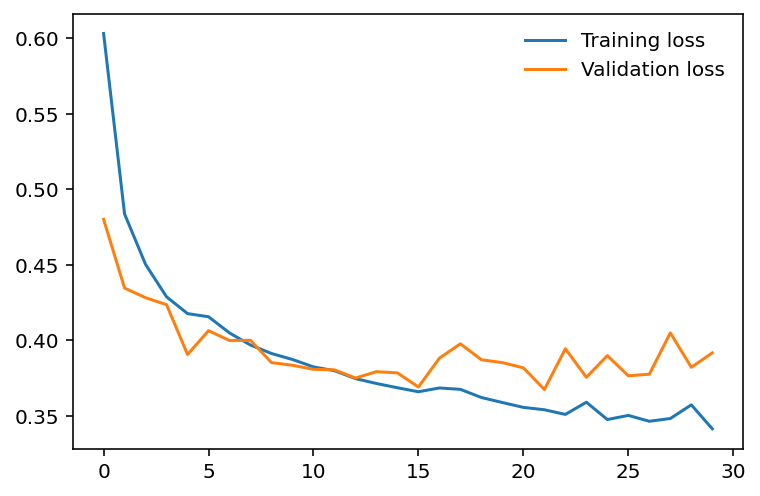

In [14]:
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

### So above we can see clearly that the model has tried preventing overfitting.
### That's a great thing to achieve compared to the first graph.

### Saving our model, so that we can reuse it at later point.

In [15]:
print ('Our model:\n\n', model, '\n')
print ('The state dict keys: \n\n', model.state_dict().keys())

Our model:

 Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
) 

The state dict keys: 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


In [16]:
file = '/content/drive/My Drive/Artificial Intelligence/trained_f_mnist_model.pth'
torch.save(model.state_dict(), file)

In [17]:
# Loading the model
filepath = '/content/drive/My Drive/Artificial Intelligence/trained_f_mnist_model.pth'
state_dict = torch.load(filepath)
print (state_dict.keys())

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


voila!! we got the same keys..

In [18]:
# to load the state dict into the network
model.load_state_dict(state_dict)

<All keys matched successfully>

Seems pretty straightforward, but as usual it's a bit more complicated. Loading the state dict works only if the model architecture is exactly the same as the checkpoint architecture. If I create a model with a different architecture, this fails.

In [21]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.fc1 = nn.Linear(784,400)
    self.fc2 = nn.Linear(400,200)
    self.fc3 = nn.Linear(200,100)
    self.fc4 = nn.Linear(100,10)

  def forward(self,x):
    pass

In [23]:
# This will giver error now

model = Classifier()
model.load_state_dict(state_dict)

RuntimeError: ignored

This means we need to rebuild the model exactly as it was when trained. Information about the model architecture needs to be saved in the checkpoint, along with the state dict. To do this, you build a dictionary with all the information you need to compeletely rebuild the model.

In [ ]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

Now the checkpoint has all the necessary information to rebuild the trained model. You can easily make that a function if you want. Similarly, we can write a function to load checkpoints.

In [ ]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [ ]:
model = load_checkpoint('checkpoint.pth')
print(model)

In [24]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.fc1 = nn.Linear(784,256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,10)

  def forward(self,x):
    pass

In [25]:
model = Classifier()
model.load_state_dict(state_dict)

<All keys matched successfully>